Example: A Growth Model
==

In [1]:
B=10; M=5; alpha=0.5; beta=0.9
u(c) = c^alpha

n=B+M+1
m=M+1

R = Array(Float64,n,m)
Q = zeros(Float64,n,m,n)

[R[s+1,a+1] = a<=s ? u(s-a) : -Inf for a=0:M, s=0:(B+M)]
[Q[:,a+1,(a:(a+B))+1] = 1/(B+1) for a=0:M];

In [2]:
using QuantEcon
ddp = DiscreteDP(R,Q,beta);

In [3]:
results = solve(ddp,PFI);

In [4]:
fieldnames(results)

5-element Array{Symbol,1}:
 :v       
 :Tv      
 :num_iter
 :sigma   
 :mc      

In [5]:
results.v

16-element Array{Float64,1}:
 19.0174
 20.0174
 20.4316
 20.7495
 21.0408
 21.3087
 21.5448
 21.7693
 21.9827
 22.1882
 22.3845
 22.5781
 22.7611
 22.9438
 23.1153
 23.2776

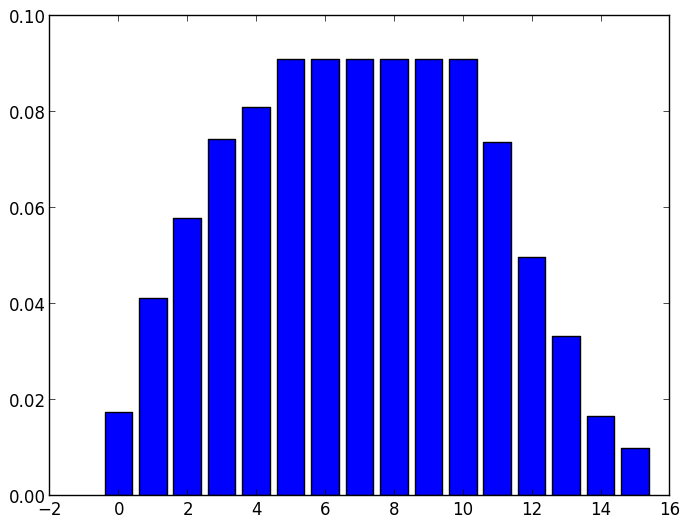

In [6]:
using PyPlot
bar(0:(B+M),mc_compute_stationary(results.mc), align="center");

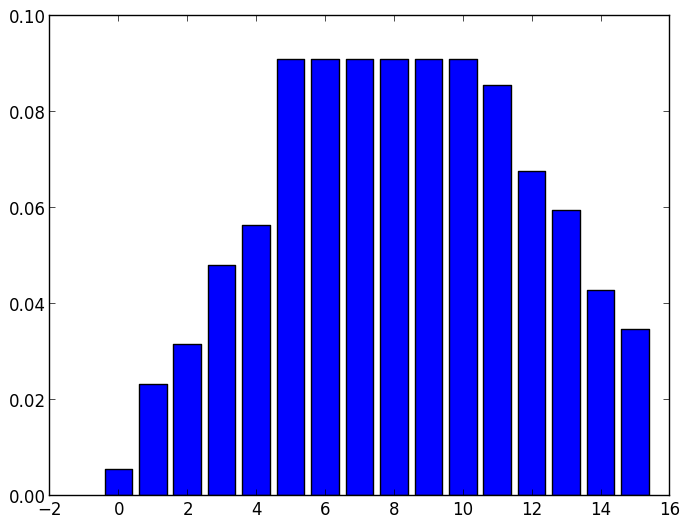

In [7]:
ddp = DiscreteDP(R,Q,0.99)
results = solve(ddp,PFI)
bar(0:(B+M),mc_compute_stationary(results.mc), align="center");

In [8]:
s_indices = Int64[]
a_indices = Int64[]
Q = Array(Float64,0,n)
R = Float64[]
b = 1.0 / (B + 1)

for s in 0:(M+B)
    for a in 0:min(M, s)
        s_indices = [s_indices; s+1]
        a_indices = [a_indices; a+1]
        q = zeros(Float64,1,n)
        q[(a+1):((a + B)+1)] = b 
        Q = [Q; q]
        R = [R; u(s-a)]
    end
end


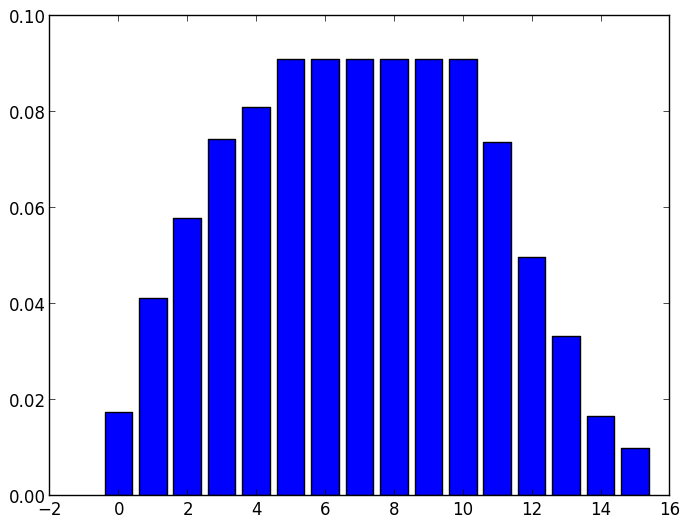

In [9]:
ddp = DiscreteDP(R,Q,beta,s_indices,a_indices);
results = solve(ddp,PFI)
bar(0:(B+M),mc_compute_stationary(results.mc), align="center");